In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [77]:
class Particle:
#     n = None
#     position = None
#     new_position = None
#     pbest = None
#     cval = None
#     velocity = None
    velocity_space = None
    
    def __init__(self, n, func, s_space, max_vel):
        self.n = n
        self.position = np.asarray([np.random.random()*(s[1]-(s[0]))+(s[0]) for s in s_space])
        self.new_position = np.asarray([np.random.random()*(s[1]-(s[0]))+(s[0]) for s in s_space])
        self.pbest = func(self.position)
        self.cval = self.pbest
        Particle.velocity_space = np.append(-.3*np.abs(s_space[:,1]-s_space[:,0]).reshape(n,1), .3*np.abs(s_space[:,1]-s_space[:,0]).reshape(n,1), axis=1)
        self.velocity = np.random.random(n)*(Particle.velocity_space[:,1] - Particle.velocity_space[:,0])
        
    def update_velocity(self, gbest, max_vel, c1, c2):
        r1 = np.random.random()
        r2 = np.random.random()
        new_vel = .5*self.velocity + c1*r1*(self.pbest-self.position) + c2*r2*(gbest-self.position)
        new_vel = np.fmax(new_vel, Particle.velocity_space[:,0])
#         new_vel = np.fmax(new_vel, -max_vel*np.ones(self.n))
        self.velocity = np.fmin(new_vel, Particle.velocity_space[:,1])
        return new_vel
    
    def update_pos(self, gbest, func):
        self.new_position = self.position + self.velocity
        new_f_val = func(self.new_position)
        if new_f_val < func(self.position):
            self.pbest = self.new_position
            if new_f_val < func(gbest):
                return self.new_position
        return gbest
    
    def make_step(self):
        self.position = self.new_position

In [78]:
def disp(particles):
    sigma = norm(np.asarray([o.new_position for o in particles]) - np.asarray([o.position for o in particles]))
    return sigma.sum()
def norm(x):
    return np.sqrt((x**2).sum())

In [93]:
def SwrmPrtclOpt(n, search_space, opt_func, epsilon, prtcls_count=30, l_factor1=2, l_factor2=2, velocity_limit=1, iterno=500):
    fig, axes = plt.subplots(2,5, figsize=[15,7])
    plt.subplots_adjust(hspace=.6, wspace=.8)
    particles = [Particle(n, opt_func, search_space, velocity_limit) for i in range(prtcls_count)]
    plot_x, plot_y = 0,0
    for i in range(iterno):
#         new_val = np.array([p.cval for p in particles])
        if disp(particles) < epsilon:
#             simplex = new_val
#             plt.plot(np.append(simplex[:,0],simplex[0,0]), np.append(simplex[:,1],simplex[0,1]))
            print('Convergence at {0:.3f}\nArgument value'.format(opt_func(gbest)))
            print(gbest)
#             print('Func value = ', opt_func(simplex[0]))
#             print('No of iterations =',i)
#             print('Final simplex = ', simplex)
            plt.show()
            return
        gbest = particles[np.argmin([p.cval for p in particles])].position
        for p in particles:
            p.make_step()
            p.update_velocity(gbest, velocity_limit, l_factor1, l_factor2)
            gbest = p.update_pos(gbest, opt_func)
#         simplex = new_val
        
        if i%(iterno/10) == 0:
            axes[plot_y][plot_x].plot([p.position[0] for p in particles], [p.position[1] for p in particles], linestyle='', marker='x')
            axes[plot_y][plot_x].grid()
            axes[plot_y][plot_x].set_title(repr(plot_y*5+plot_x+1))
            print('F val={} at {}'.format(opt_func(gbest), gbest))
            if plot_x > 3:
                plot_x = 0
                plot_y += 1
            else:
                plot_x += 1
    print('Summary')
    print('Failed to converge\nFunction value is {0:.3f}\nArgument value'.format(opt_func(gbest)))
    print(gbest)
    print(Particle.velocity_space)
    plt.show()

F val=2.3532041868333806 at [ 2.80352805  2.34726179]
F val=0.04170094317700693 at [ 2.99702388  1.95185202]
F val=0.0008378839335853277 at [ 3.00518034  1.99665499]
F val=0.0008481417166280549 at [ 3.00045588  1.9926826 ]
F val=5.108025147295652e-06 at [ 3.0003309  1.999489 ]
F val=4.064186092398234e-09 at [ 3.00000728  1.9999838 ]
F val=1.3937699362003797e-08 at [ 2.99998059  2.00002283]
F val=7.459474195833708e-10 at [ 2.99999998  2.00000664]
F val=7.319389052373002e-10 at [ 3.00000076  2.00000603]
F val=9.168258500094882e-10 at [ 2.99999457  2.00000316]
Summary
Failed to converge
Function value is 0.000
Argument value
[ 2.99999808  2.00000493]
[[-3.   3. ]
 [-1.8  1.8]]


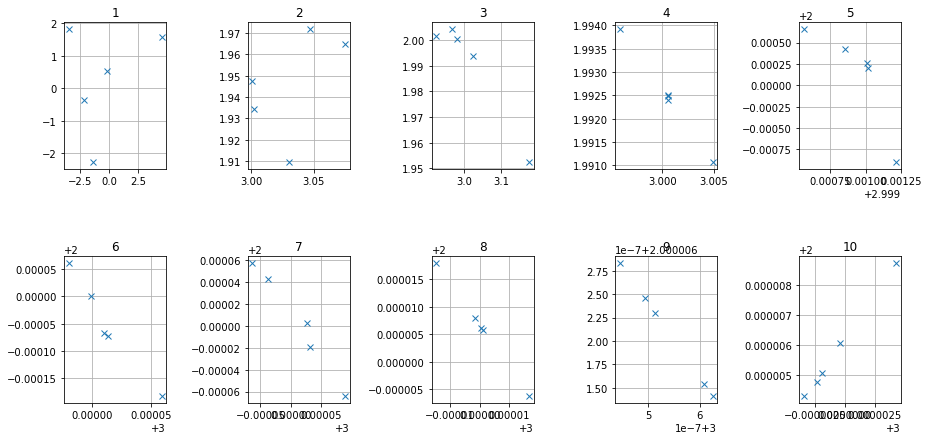

In [94]:
SwrmPrtclOpt(2, spc, Himmelblau, 1e-10, iterno=500, prtcls_count=5, velocity_limit=.5)

In [402]:
Himmelblau([ 3.39314238,  1.26738216])

7.173639958541349

In [604]:
ps = [Particle(2, Himmelblau, spc, 1) for i in range(5)]

In [785]:
[p.update_velocity([ 3.39314238,  1.26738216], 1, 2, 2) for p in ps]

[array([ 3.90106516,  4.16661467]),
 array([ 16.35076682,  17.67383041]),
 array([ 73.79126334,  65.8504972 ]),
 array([ 90.12102861,  92.27252397]),
 array([ 29.12566522,  25.87923755])]

In [794]:
[p.position[0] for p in ps]

[3.7733004015829348,
 2.3956633047923024,
 -3.7507929890867588,
 0.31230641160439188,
 -2.6131514888250305]

In [451]:
ggbest=np.array([ 3.39314238,  1.26738216])

In [468]:
ps[0].update_velocity(ggbest, 1, 2, 2)

In [7]:
spc = np.array([[-5,5], [-3,3]])

In [219]:
np.asarray([np.random.random()*(i-(-i))+(-i) for i in range(1,5)])

array([ 0.99761723, -0.22162526, -1.22371037, -3.82879424])

In [41]:
spc

array([[-5,  5],
       [-3,  3]])

In [74]:
np.append(-.3*np.abs(spc[:,1]-spc[:,0]).reshape(2,1), .3*np.abs(spc[:,1]-spc[:,0]).reshape(2,1), axis=1)

array([[-3. ,  3. ],
       [-1.8,  1.8]])

In [267]:
b

array([[-1.05893211,  1.83884201],
       [ 0.96853092,  2.34247998],
       [-1.49533797,  2.24420928],
       [ 1.82734445, -2.68422557],
       [-0.78674856,  2.39910379]])

In [268]:
a-b

array([[ 5.52743317, -0.32676976],
       [-5.54630438, -0.50440804],
       [-2.87736929, -3.29303306],
       [-2.90294711,  0.68971606],
       [ 5.75745772, -3.88285302]])

In [432]:
ps[0].cval =2

In [433]:
ps[0].cval

2

In [790]:
plt. subplots(1,2)

(<matplotlib.figure.Figure at 0x7f623428bd30>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62317f3390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6231800f98>], dtype=object))